In [2]:
from __future__ import print_function, division

import os, sys
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from preprocess_image import crop_face, crop_more
from FaceAging import FaceAging
%matplotlib inline

         when using: `python -m better_exceptions'. Otherwise, only code
         loaded from files will be inspected!


In [11]:
# PATHS
INPUT_PATH = "./cropped_images_for_demo"
#INPUT_PATH = "./output_images/"
CASCADE_PATH = "./haarcascades/haarcascade_frontalface_alt.xml"

In [4]:
def normalize_image(image):
    return (image + 1.) / 2.

In [5]:
# read images
image_name_list = sorted(os.listdir(INPUT_PATH))
images = []
for i, image_name in enumerate(image_name_list):
    image_path = os.path.join(INPUT_PATH, image_name)
    images.append(np.array(cv2.imread(image_path)))
    
images = np.array(images)

In [47]:
print(images.shape)

(10, 128, 128, 3)


In [12]:
config = tf.ConfigProto(
    gpu_options=tf.GPUOptions(
        visible_device_list="0"))
config.gpu_options.allow_growth = True

In [13]:
sess = tf.Session(config=config)
model = FaceAging(
    session=sess,
    is_training=False,
    save_dir='./save',
    dataset_name='UTKFace',
    synthesize=True
)


	Building graph ...
Tensor("Shape_2:0", shape=(2,), dtype=int32)
Tensor("Shape_3:0", shape=(2,), dtype=int32)


In [16]:
images_male, images_female = model.custom_test(INPUT_PATH + '/*jpg')


	Loading pre-trained model ...
	SUCCESS ^_^

	Done! Results are saved as ./save/test/test_as_xxx.png



TypeError: 'NoneType' object is not iterable

In [9]:
print(images_male.shape)

(10, 128, 128, 3)


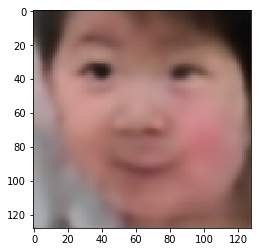

In [15]:
plt.imshow(normalize_image(images_male[0]))

In [ ]:
sess.close()